In [1]:
from __future__ import division
import nltk
nltk.download('punkt')
nltk.download('popular')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Javed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Javed\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Javed\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Javed\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Javed\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Javed\AppDa

In [2]:
storytext = open("new.txt").read()

In [3]:
def preprocess(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    return " ".join(tokens)
preprocessedStory = preprocess(storytext)
tokens = nltk.word_tokenize(preprocessedStory)
print(tokens[0:20])

['by', 'the', 'middle', 'of', 'the', '19th', 'century', 'soho', 'had', 'become', 'an', 'insanitary', 'place', 'of', 'cow', 'sheds', 'animal', 'droppings', 'slaughterhouses', 'grease']


In [4]:
def lexical_diversity(text):
    return len(set(text))/len(text)
lexical_diversity(tokens)

0.1671346239101522

In [5]:
len(tokens)

13534

In [6]:
len(set(tokens))

2262

In [7]:
fdist1 = FreqDist(tokens)
print(fdist1)

<FreqDist with 2262 samples and 13534 outcomes>


In [8]:
fdist1.plot(50, cumulative=True)

<Figure size 640x480 with 1 Axes>

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
remstop = [i for i in tokens if i not in stop]
remstop[0:20]

['middle',
 '19th',
 'century',
 'soho',
 'become',
 'insanitary',
 'place',
 'cow',
 'sheds',
 'animal',
 'droppings',
 'slaughterhouses',
 'grease',
 'boiling',
 'dens',
 'primitive',
 'decaying',
 'sewers',
 'underneath',
 'floorboards']

In [10]:
len(remstop)

6612

In [11]:
len(set(remstop))

2147

In [12]:
lexical_diversity(remstop)

0.32471264367816094

In [13]:
fdist2 = FreqDist(remstop)
print(fdist2)

<FreqDist with 2147 samples and 6612 outcomes>


In [14]:
fdist2.most_common(20)

[('cholera', 170),
 ('water', 115),
 ('cases', 59),
 ('one', 54),
 ('disease', 49),
 ('houses', 44),
 ('two', 41),
 ('died', 40),
 ('well', 37),
 ('attacked', 37),
 ('blood', 37),
 ('day', 34),
 ('first', 33),
 ('mr', 32),
 ('time', 31),
 ('dr', 31),
 ('street', 30),
 ('case', 29),
 ('communication', 26),
 ('house', 26)]

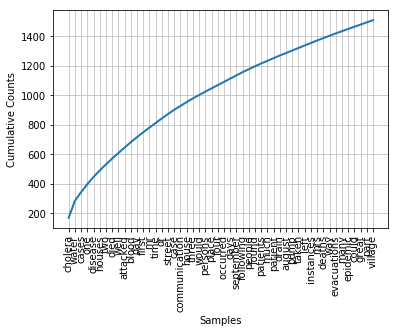

In [15]:
fdist2.plot(50, cumulative=True)

In [16]:
lexical_diversity(remstop)

0.32471264367816094

In [17]:
array = fdist2.most_common(20)
mylist = [list(i) for i in array]

In [18]:
import csv
with open('newfilefox.csv','w') as result:
    writer = csv.writer(result, dialect = 'excel')
    writer.writerows(array)
with open('tokensfox.csv','w') as result:
    writer = csv.writer(result, dialect = 'excel')
    writer.writerows(remstop)

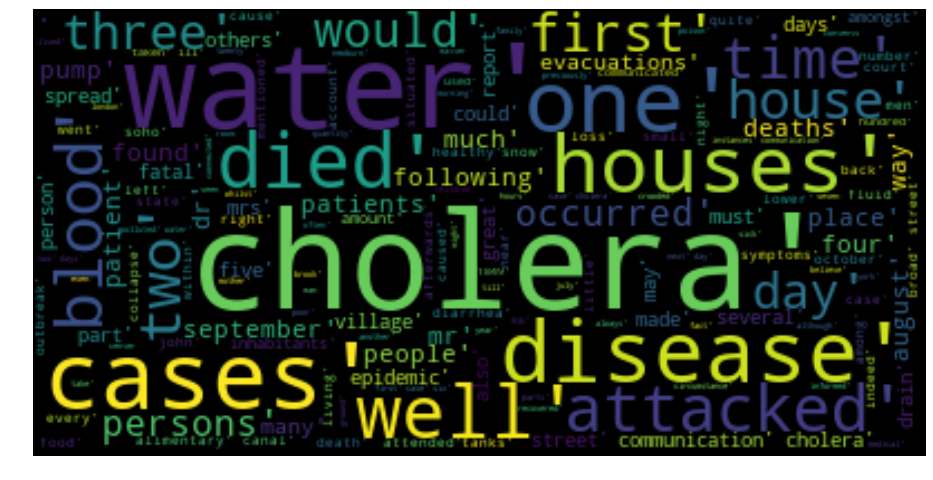

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=60).generate(str(remstop))
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

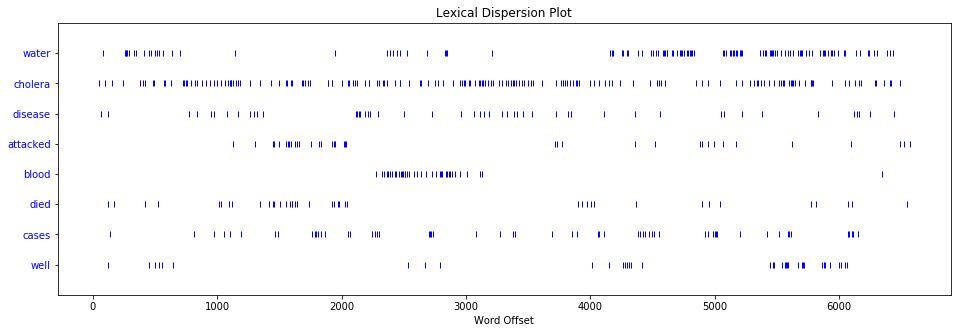

In [25]:
myText = nltk.Text(remstop)
plt.figure(figsize=(16,5))
topics = ['water', 'cholera', 'disease', 'attacked', 'blood','died','cases', 'well']
myText.dispersion_plot(topics)

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print(str(score))
sent = sentiment_analyzer_scores(storytext)

'''positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05'''

{'neg': 0.1, 'neu': 0.839, 'pos': 0.061, 'compound': -1.0}


'positive sentiment: compound score >= 0.05\nneutral sentiment: (compound score > -0.05) and (compound score < 0.05)\nnegative sentiment: compound score <= -0.05'

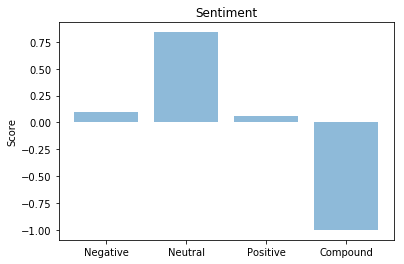

In [43]:
import numpy as np
objects = ('Negative', 'Neutral', 'Positive', 'Compound')
y_pos = np.arange(len(objects))
performance = [0.1,0.839,0.061,-1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Sentiment')

plt.show()